Implement Random -mini-batch evaluations

Explanation
Data Preparation:

The Iris dataset is loaded and standardized.
The data is converted to PyTorch tensors.
DataLoader Creation:

DataLoaders for training and testing are created with mini-batch processing enabled.
Model Definition:

A simple neural network model with one hidden layer is defined using torch.nn.Module.
Training and Evaluation:

The model is trained using mini-batches, with loss computed using CrossEntropyLoss and optimization using Adam.
After each epoch, the model's accuracy on the training and test sets is evaluated and recorded.
Visualization:

The test accuracy over epochs is plotted using Matplotlib.


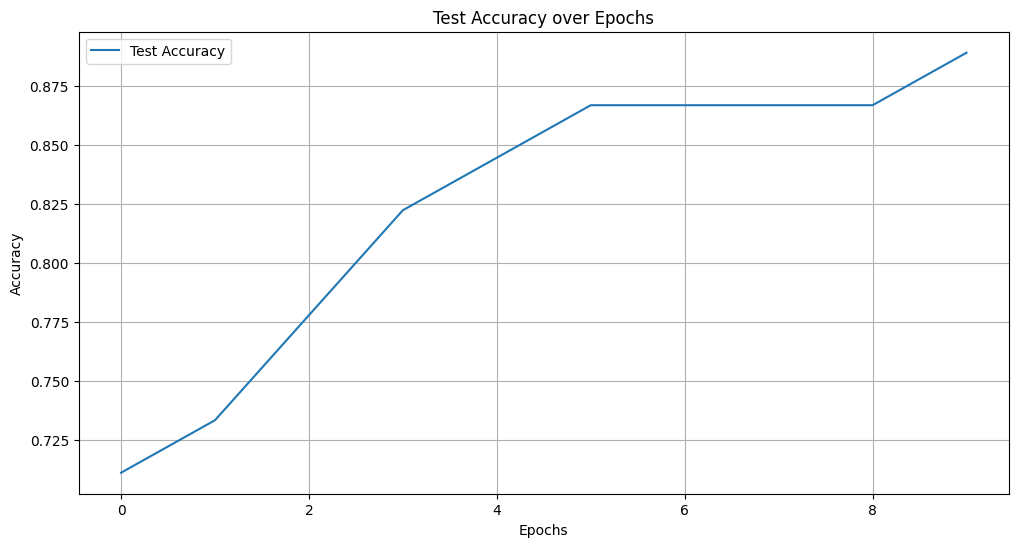

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.3, random_state=42)

# Create DataLoader for mini-batch processing
batch_size = 20
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(4, 10)
        self.layer2 = nn.Linear(10, 3)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.layer2(x)
        return x

model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training and evaluation
n_epochs = 10
train_accuracies = []
test_accuracies = []

for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    # Evaluate on the training set
    model.eval()
    train_correct = 0
    with torch.no_grad():
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            train_correct += (predicted == y_batch).sum().item()
    train_acc = train_correct / len(train_loader.dataset)
    train_accuracies.append(train_acc)

    # Evaluate on the test set
    test_correct = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            test_correct += (predicted == y_batch).sum().item()
    test_acc = test_correct / len(test_loader.dataset)
    test_accuracies.append(test_acc)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(n_epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()
